# Surface vertex classification

In this notebook we demonstrate how to retrieve surface/vertex measurements to classify vertices on the surface. The used example data is a derived from of [AV Luque and JV Veenvliet (2023)](https://zenodo.org/record/7603081#.Y94N4XbMJmN) licensed [CC-BY](https://creativecommons.org/licenses/by/4.0/legalcode). See the [creating_surfaces](creating_surfaces.ipynb) for how to create the surface from raw imaging data.

See also
* [vedo library](https://vedo.embl.es/)
* [vedo add curvature documentation](https://vedo.embl.es/autodocs/content/vedo/mesh.html?highlight=curvature#vedo.mesh.Mesh.addCurvatureScalars)

You need to additionally install the [napari-accelerated-pixel-and-object-classification plugin](https://www.napari-hub.org/plugins/napari-accelerated-pixel-and-object-classification). You can so by calling `conda install napari-accelerated-pixel-and-object-classification -c conda-forge` in your terminal.

In [1]:
import napari
import apoc
import numpy as np
import vedo
import napari_process_points_and_surfaces as nppas

We will be working with a simple geometry (i.e., an ellipsoid) to demonstrate the curvature property and the different settings.

In [2]:
mesh = vedo.load("gastruloid.ply")
surface = nppas.to_napari_surface_data(mesh)
len(surface[0])

249178

In [3]:
surface = nppas.remove_duplicate_vertices(surface)
surface = nppas.smooth_surface(surface, number_of_iterations=15)
simplified = nppas.decimate_quadric(surface, fraction=0.02)
len(simplified[0])

5008

## Surface visualization
The surface itself does not come with any quantification. It looks like this:

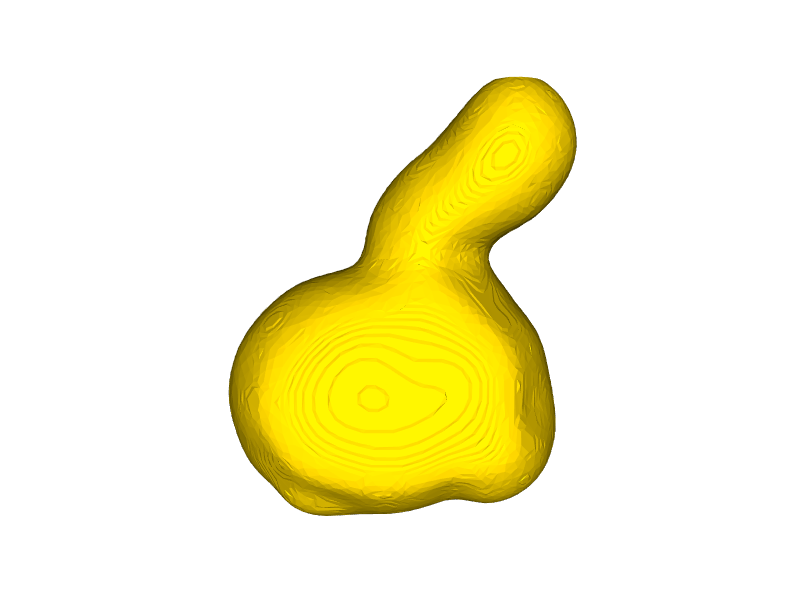

In [4]:
nppas.show(simplified, azimuth=-90)

## Quantification
We can create a table ([pandas Dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)) like this.

In [5]:
requested_measurements = [nppas.Quality.AREA, 
                          nppas.Quality.ASPECT_RATIO,
                          nppas.Quality.GAUSS_CURVATURE, 
                          nppas.Quality.MEAN_CURVATURE,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_1_PERCENT,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_2_PERCENT,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_5_PERCENT,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_10_PERCENT,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_25_PERCENT,
                          nppas.Quality.SPHERE_FITTED_CURVATURE_50_PERCENT]

df = nppas.surface_quality_table(simplified, requested_measurements)
df

,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_1_PERCENT,Quality.SPHERE_FITTED_CURVATURE_2_PERCENT,Quality.SPHERE_FITTED_CURVATURE_5_PERCENT,Quality.SPHERE_FITTED_CURVATURE_10_PERCENT,Quality.SPHERE_FITTED_CURVATURE_25_PERCENT,Quality.SPHERE_FITTED_CURVATURE_50_PERCENT
0,0,23.313960,2.168165,-0.010775,-0.001016,NaN,NaN,NaN,0.000912,0.000076,0.000019
1,1,8.951144,2.546586,0.105133,0.003565,NaN,NaN,NaN,0.001998,0.000047,0.000016
2,2,22.658085,2.509155,0.080181,0.001041,NaN,NaN,NaN,0.000912,0.000079,0.000016
3,3,17.370708,5.760160,-0.086199,-0.002019,NaN,NaN,NaN,0.000958,0.000109,0.000019
4,4,11.881273,2.241013,0.108912,0.004844,NaN,NaN,NaN,0.002243,0.000054,0.000016
...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,7.042653,2.022869,-0.010354,0.425163,NaN,NaN,0.000029,0.000213,0.000036,0.000085
5004,5004,6.749437,2.615918,-0.039365,0.444615,NaN,NaN,0.000633,0.001185,0.000145,0.000076
5005,5005,1.824333,4.660874,0.000000,6.245553,NaN,NaN,0.000192,0.000311,0.000129,0.000086
5006,5006,5.683580,1.977261,0.013995,0.812282,NaN,NaN,0.000025,0.000145,0.000034,0.000090


To get an overview about measurements, we can summarize them:

In [6]:
df.describe()

,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_1_PERCENT,Quality.SPHERE_FITTED_CURVATURE_2_PERCENT,Quality.SPHERE_FITTED_CURVATURE_5_PERCENT,Quality.SPHERE_FITTED_CURVATURE_10_PERCENT,Quality.SPHERE_FITTED_CURVATURE_25_PERCENT,Quality.SPHERE_FITTED_CURVATURE_50_PERCENT
count,5008.000000,5008.000000,5008.000000,5008.000000,5008.000000,0.0,0.0,2.481000e+03,5005.000000,5008.000000,5008.000000
mean,2503.500000,16.617808,2.355639,0.016582,0.013388,NaN,NaN,6.338240e-03,0.002112,0.000595,0.000295
std,1445.829404,6.388986,1.577724,0.076045,0.342500,NaN,NaN,1.286027e-02,0.003503,0.000611,0.000160
min,0.000000,0.452211,1.082939,-0.681899,-0.012398,NaN,NaN,5.415701e-10,0.000022,0.000029,0.000015
25%,1251.750000,12.565410,1.624500,-0.004115,-0.000310,NaN,NaN,2.857446e-04,0.000351,0.000182,0.000157
50%,2503.500000,15.647845,2.006444,0.012544,0.000060,NaN,NaN,1.219591e-03,0.000668,0.000374,0.000232
75%,3755.250000,19.498713,2.610533,0.032581,0.000435,NaN,NaN,5.362509e-03,0.001739,0.000687,0.000449
max,5007.000000,97.274682,44.299573,2.053640,22.093537,NaN,NaN,1.019477e-01,0.023401,0.002529,0.000590


From that table, we can extract a single column as list.

In [7]:
sp_curvature = list(df['Quality.SPHERE_FITTED_CURVATURE_10_PERCENT'])
sp_curvature[:5]

[0.0009123982685591422,
 0.001997536824241164,
 0.0009123982685591422,
 0.0009583956525928731,
 0.0022431694451128838]

## Visualizing measurements
To visualize the measurements, we need to attach them to the surface:

In [8]:
quantified_surface = nppas.set_vertex_values(simplified, sp_curvature)

The visualization can be customized as well, e.g. by changing the view angle and the colormap.

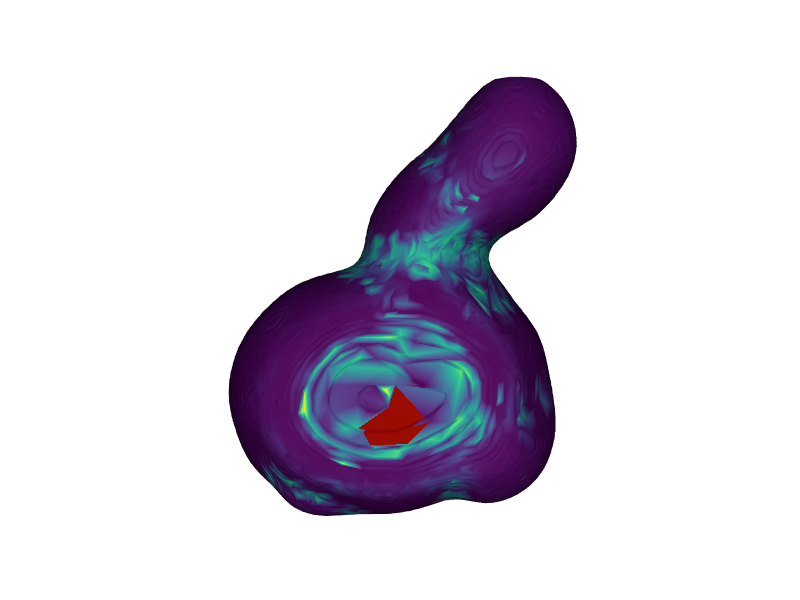

In [9]:
nppas.show(quantified_surface, azimuth=-90)

In [10]:
viewer = napari.Viewer(ndisplay=3)
viewer.camera.angles = (40, -30, 55)

In [11]:
surface_layer = viewer.add_surface(simplified, colormap='hsv')

In [12]:
surface_layer.properties = df.to_dict(orient='list')
surface_layer.features = df

In [13]:
from napari_skimage_regionprops import add_table
add_table(surface_layer, viewer)

Napari status bar display of label properties disabled because https://github.com/napari/napari/issues/5417 and https://github.com/napari/napari/issues/4342


In [14]:
viewer.window.add_dock_widget(nppas.SurfaceAnnotationWidget(viewer))

# Manual annotation
Use the napari window and the Surface Annotation Widget to draw with value 2 and 3 in concave and convex region on the surface.

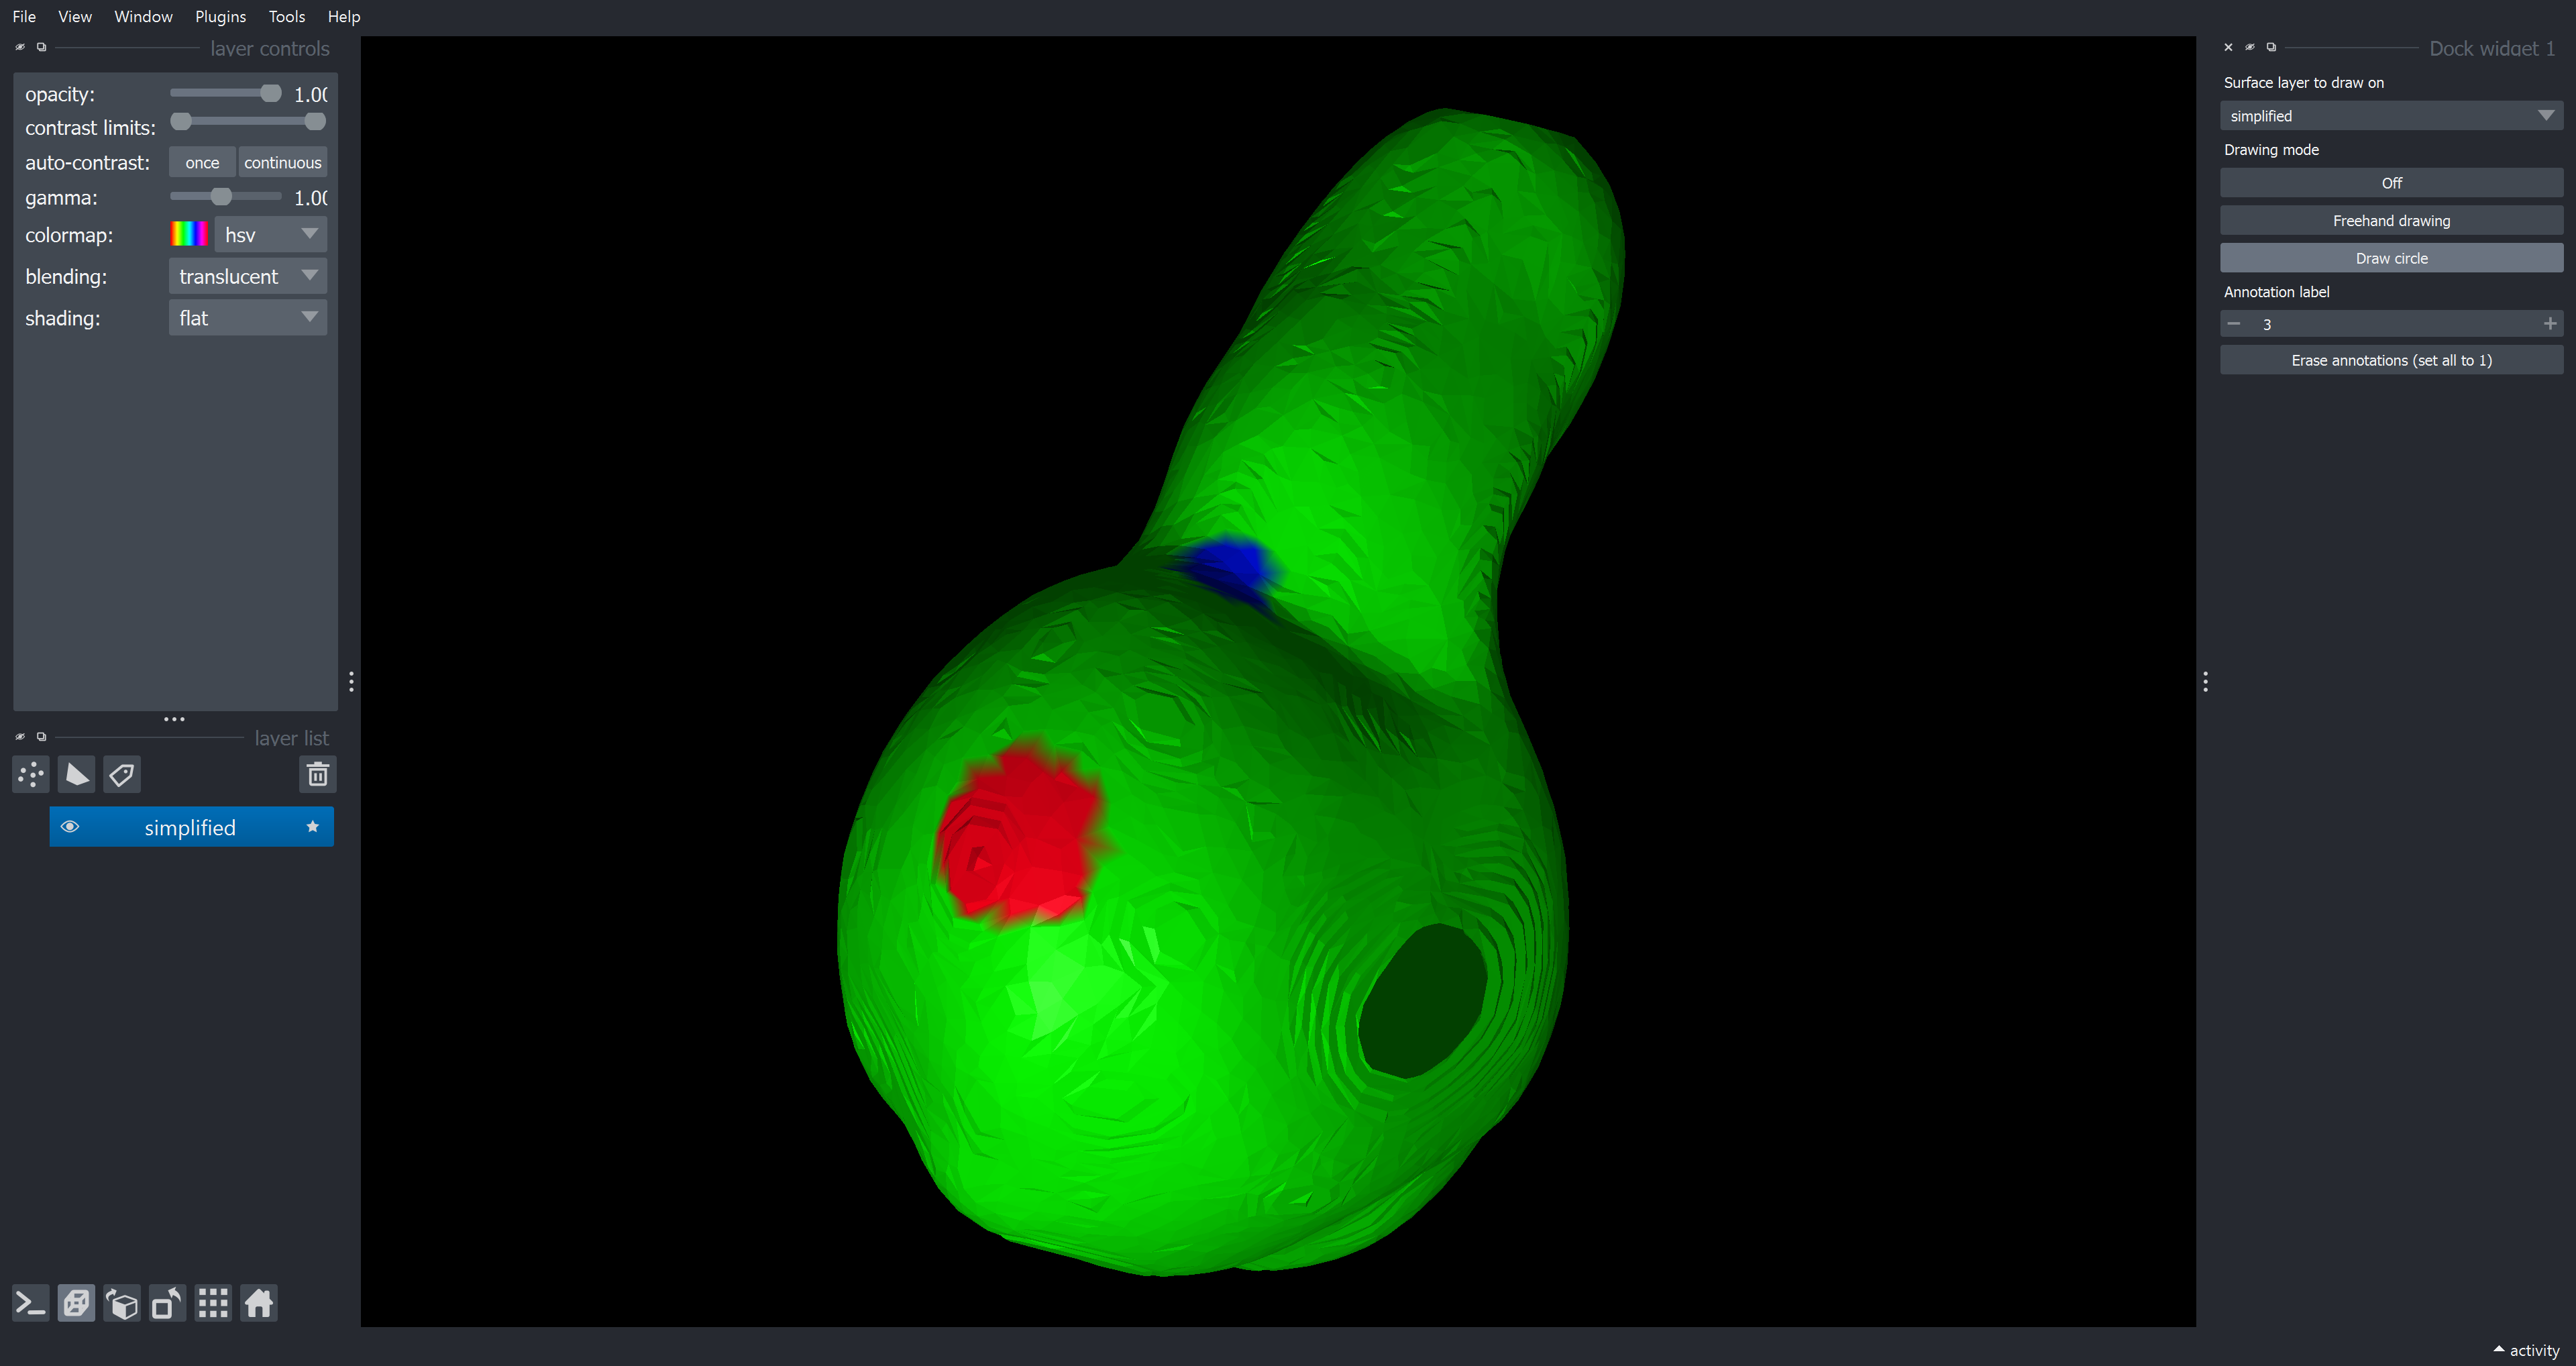

In [15]:
napari.utils.nbscreenshot(viewer)

In [16]:
from napari_accelerated_pixel_and_object_classification._surface_vertex_classifier import SurfaceVertexClassifierWidget
viewer.window.add_dock_widget(SurfaceVertexClassifierWidget(viewer))

# Train classifier
Next, we can use the Surface Vertex Classification widget to train a classifier.

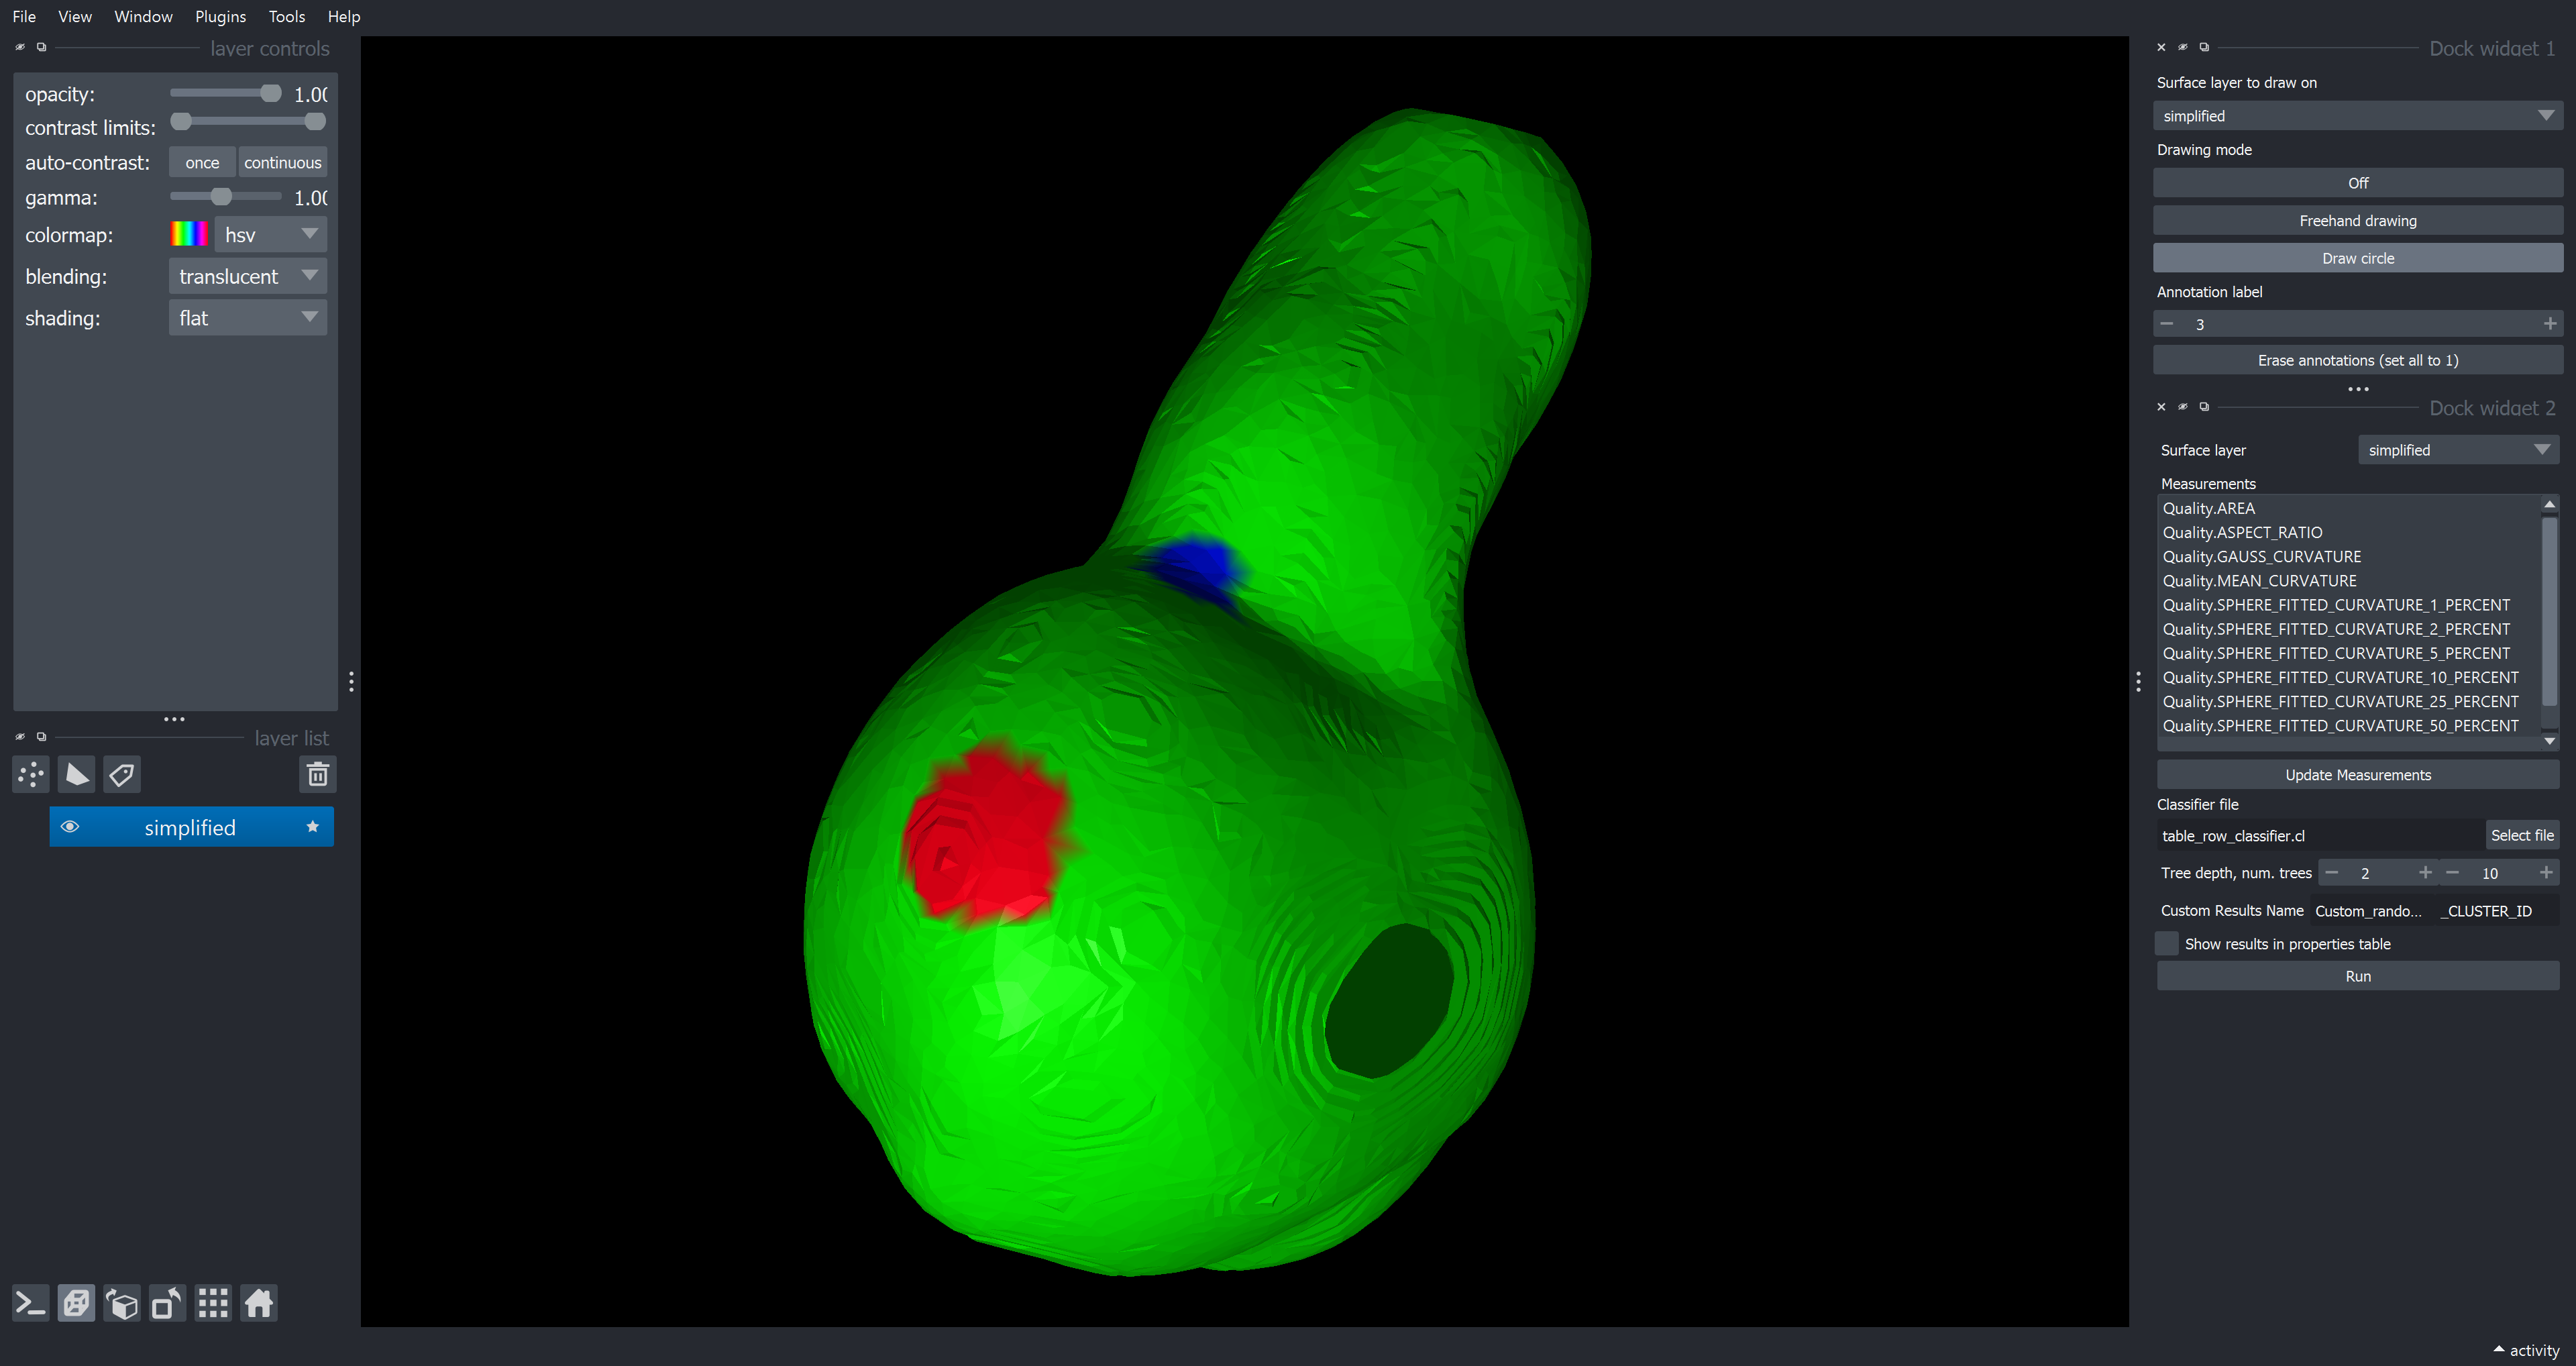

In [17]:
napari.utils.nbscreenshot(viewer)

## Apply classifier

The classifier is an [apoc](https://github.com/haesleinhuepf/apoc) TableRowClassifier, which can be applied to the table/DataFrame above.

In [18]:
table_row_classifier = apoc.TableRowClassifier(opencl_filename='table_row_classifier.cl')

In [19]:
result = table_row_classifier.predict(df)

In [20]:
result

array([2, 2, 2, ..., 2, 2, 2], dtype=uint32)

In [21]:
df['classification'] = result
df

,vertex_index,Quality.AREA,Quality.ASPECT_RATIO,Quality.GAUSS_CURVATURE,Quality.MEAN_CURVATURE,Quality.SPHERE_FITTED_CURVATURE_1_PERCENT,Quality.SPHERE_FITTED_CURVATURE_2_PERCENT,Quality.SPHERE_FITTED_CURVATURE_5_PERCENT,Quality.SPHERE_FITTED_CURVATURE_10_PERCENT,Quality.SPHERE_FITTED_CURVATURE_25_PERCENT,Quality.SPHERE_FITTED_CURVATURE_50_PERCENT,classification
0,0,23.313960,2.168165,-0.010775,-0.001016,NaN,NaN,NaN,0.000912,0.000076,0.000019,2
1,1,8.951144,2.546586,0.105133,0.003565,NaN,NaN,NaN,0.001998,0.000047,0.000016,2
2,2,22.658085,2.509155,0.080181,0.001041,NaN,NaN,NaN,0.000912,0.000079,0.000016,2
3,3,17.370708,5.760160,-0.086199,-0.002019,NaN,NaN,NaN,0.000958,0.000109,0.000019,2
4,4,11.881273,2.241013,0.108912,0.004844,NaN,NaN,NaN,0.002243,0.000054,0.000016,2
...,...,...,...,...,...,...,...,...,...,...,...,...
5003,5003,7.042653,2.022869,-0.010354,0.425163,NaN,NaN,0.000029,0.000213,0.000036,0.000085,2
5004,5004,6.749437,2.615918,-0.039365,0.444615,NaN,NaN,0.000633,0.001185,0.000145,0.000076,2
5005,5005,1.824333,4.660874,0.000000,6.245553,NaN,NaN,0.000192,0.000311,0.000129,0.000086,2
5006,5006,5.683580,1.977261,0.013995,0.812282,NaN,NaN,0.000025,0.000145,0.000034,0.000090,2


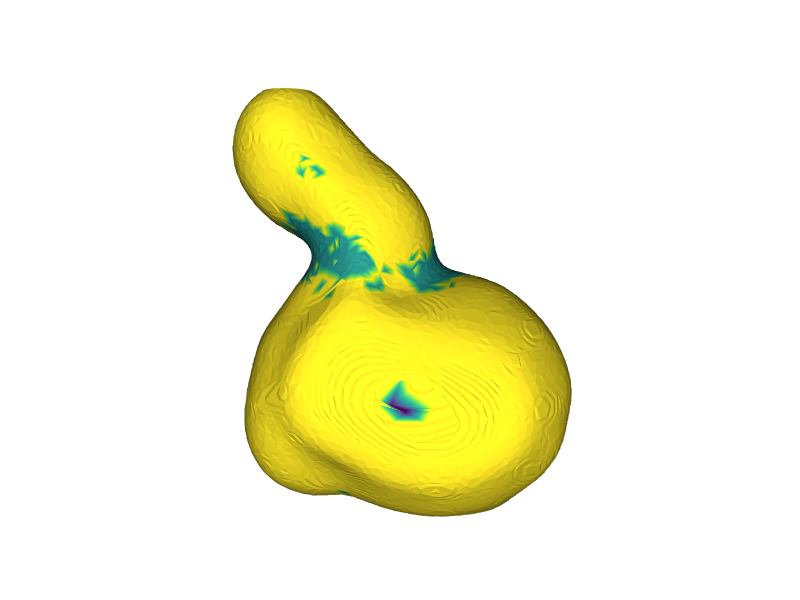

In [22]:
annotated_surface = nppas.set_vertex_values(simplified, result)
nppas.show(annotated_surface, azimuth=90)